In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
R_al = np.array([17.95,
18.00,
18.05,
18.10,
18.15,
18.20,
18.25,
18.30,
18.35,
18.40,
18.45,
18.50,
18.55])
time_al = np.array([
0,     
48,    
108,   
171,   
236,   
303,   
373,   
443,   
514,   
592,   
669,   
748,   
830])
time_fe = np.array([
0,   
62,  
130, 
202, 
275, 
351, 
430, 
510, 
593, 
679, 
766, 
856])
time_void = np.array([
0,
40,
87,
135,
184,
235,
288,
342,
397,
454,
513])
R_fe = np.array([
18.00,
18.05,
18.10,
18.15,
18.20,
18.25,
18.30,
18.35,
18.40,
18.45,
18.50,
18.55])
R_void = np.array([17.95,
18.00,
18.05,
18.10,
18.15,
18.20,
18.25,
18.30,
18.35,
18.40,
18.45
])

len(R_void)

11

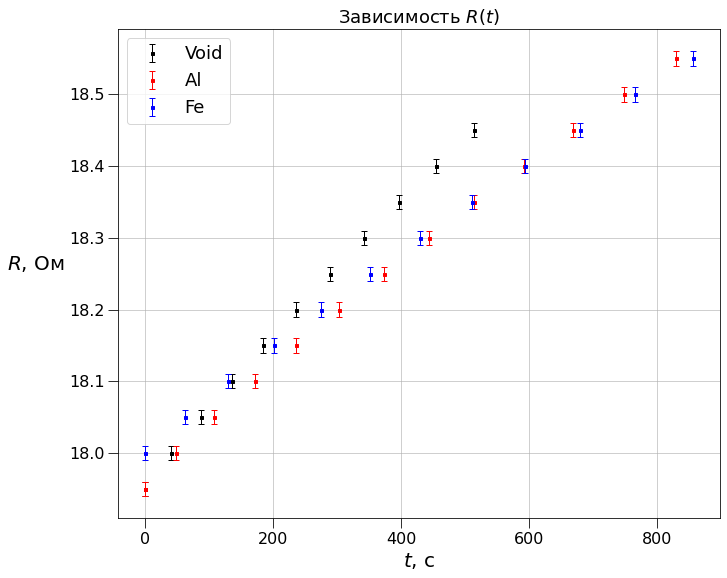

In [3]:
plot_1 = plt.figure(figsize=(12*0.9,10*0.9))
plt.grid(visible=True, linewidth=0.6)

plt.title('Зависимость $R(t)$', fontsize=18)
#plt.xlim(xmin=0, xmax=0.03)
#plt.ylim(ymin=0, ymax=100)
plt.ylabel('$R$, Ом', fontsize=20, rotation=0, ha='right')
plt.xlabel('$t$, c', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=16, size=10)
plt.grid(visible=True, linewidth=0.6)



yerr_1 = 0.01
xerr_1 = 2



#z, err = np.polyfit(D, Q[1], deg=1, cov=True)
#polynom_2 = np.poly1d(z)
#plt.plot(D, polynom_2(D),"b--", linewidth=1, label="МНК")

plt.errorbar(
    time_void,
    R_void,
    fmt='ks',
    linewidth=1,
    markersize=3,
    elinewidth=1,
    label='Void',
    #xerr=xerr_1,
    yerr=yerr_1,
    capsize=3
)

plt.errorbar(
    time_al,
    R_al,
    fmt='rs',
    linewidth=0,
    markersize=3,
    elinewidth=1,
    label='Al',
    #xerr=xerr_1,
    yerr=yerr_1,
    capsize=3
)

plt.errorbar(
    time_fe,
    R_fe,
    fmt='bs',
    linewidth=0,
    markersize=3,
    elinewidth=1,
    label='Fe',
    #xerr=xerr_1,
    yerr=yerr_1,
    capsize=3
)

#z = np.polyfit(1/p, D, deg=1)
#polynom_1 = np.poly1d(z)
#p = np.array([40, 100, 160, 220, 280, 760])
#plt.plot(1/p, polynom_1(1/p),"r--", linewidth=1, label="МНК")


plt.legend(fontsize=18, markerscale = 1)
plt.show()

plot_1.savefig(
    'R(t).pdf',
    format='pdf',
    bbox_inches='tight',
    #pad_inches=4
)

In [4]:
dtime_void = time_void[1:] - time_void[:-1]
dtime_al = time_al[1:] - time_al[:-1]
dtime_fe = time_fe[1:] - time_fe[:-1]
der_void = 0.05/dtime_void
der_al = 0.05/dtime_al
der_fe = 0.05/dtime_fe

0.001147463488781468
0.0008375402214710519
0.0007828487421306513


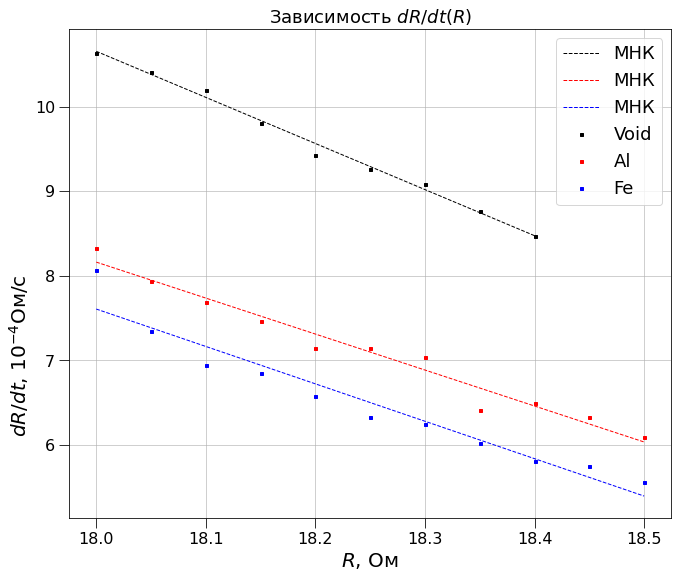

In [13]:
plot_2 = plt.figure(figsize=(12*0.9,10*0.9))
plt.grid(visible=True, linewidth=0.6)

plt.title('Зависимость $dR/dt(R)$', fontsize=18)
#plt.xlim(xmin=0, xmax=0.03)
#plt.ylim(ymin=0, ymax=100)
plt.ylabel('$dR/dt$, $10^{-4}$Ом/с', fontsize=20, ha='right')
plt.xlabel('$R$, Ом', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=16, size=10)
plt.grid(visible=True, linewidth=0.6)



yerr_1 = 0.01
xerr_1 = 2



#z, err = np.polyfit(D, Q[1], deg=1, cov=True)
#polynom_2 = np.poly1d(z)
#plt.plot(D, polynom_2(D),"b--", linewidth=1, label="МНК")

plt.errorbar(
    R_void[1:-1],
    10000*der_void[1:],
    fmt='ks',
    linewidth=1,
    markersize=3,
    elinewidth=1,
    label='Void',
    #xerr=xerr_1,
    #yerr=yerr_1,
    capsize=3
)

plt.errorbar(
    R_al[1:-1],
    10000*der_al[1:],
    fmt='rs',
    linewidth=0,
    markersize=3,
    elinewidth=1,
    label='Al',
    #xerr=xerr_1,
    #yerr=yerr_1,
    capsize=3
)

plt.errorbar(
    R_fe[:-1],
    10000*der_fe,
    fmt='bs',
    linewidth=0,
    markersize=3,
    elinewidth=1,
    label='Fe',
    #xerr=xerr_1,
    #yerr=yerr_1,
    capsize=3
)
lab = "МНК"
z = np.polyfit(R_void[1:-1], der_void[1:], deg=1)
polynom_1 = np.poly1d(z)
plt.plot(R_void[1:-1], 10000*polynom_1(R_void[1:-1]),"k--", linewidth=1, label=lab)
print(polynom_1(17.85))

z = np.polyfit(R_al[1:-1], der_al[1:], deg=1)
polynom_1 = np.poly1d(z)
plt.plot(R_al[1:-1], 10000*polynom_1(R_al[1:-1]),"r--", linewidth=1, label=lab)
print(polynom_1(17.95))

z = np.polyfit(R_fe[:-1], der_fe, deg=1)
polynom_1 = np.poly1d(z)
plt.plot(R_fe[:-1], 10000*polynom_1(R_fe[:-1]),"b--", linewidth=1, label=lab)
print(polynom_1(17.95))

plt.legend(fontsize=18, markerscale = 1)
plt.show()
plot_2.savefig(
    'dRdt.pdf',
    format='pdf',
    bbox_inches='tight',
    #pad_inches=4
)

In [15]:
#Mean squared error
x = R_void[1:-1]
y = der_void[1:]
n = len(der_void[1:])
k = (np.mean(x * y) - np.mean(x) * np.mean(y)) / (np.mean(x * x) - np.mean(x) ** 2)
b = np.mean(y) - k * np.mean(x)
k_o = np.mean(x*y) / np.mean(x ** 2)
error_k = 1 / np.sqrt(n) * np.sqrt(((np.mean(y * y)) - np.mean(y) ** 2) / (np.mean(x * x) - np.mean(x) ** 2) - k**2)
k, error_k, b

(-0.0005453368107972115, 1.6174096574874066e-05, 0.010881725561513192)